# **Cleaning data**

**Reading data:**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data = pd.read_excel('/content/hi.xlsx')
data.head()
#import data from excel

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
data.drop_duplicates(inplace=True)
# Remove duplicates

data.dropna(inplace=True)
# Remove missing data

data.reset_index(drop=True, inplace=True)
print(data)

       CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0               1   22  Female      25               14              4   
1               2   41  Female      28               28              7   
2               3   47    Male      27               10              2   
3               4   35    Male       9               12              5   
4               5   53  Female      58               24              9   
...           ...  ...     ...     ...              ...            ...   
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
0                 27             Basic  

In [ ]:
data = data[~data.isin(['#']).any(axis=1)]
data = data[~data.isin(['?']).any(axis=1)]
data = data.drop(['CustomerID'], axis = 1)

In [ ]:
null_counts = data.isnull().sum()
print('Null value exist in each variable:')
for column in data.columns:
    print(f'{column}: {null_counts[column]}')
# Count the number of null values exist in each variable

Null value exist in each variable:
Age: 0
Gender: 0
Tenure: 0
Usage Frequency: 0
Support Calls: 0
Payment Delay: 0
Subscription Type: 0
Contract Length: 0
Total Spend: 0
Last Interaction: 0
Churn: 0


In [ ]:
data = pd.get_dummies(data, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)

print(data.columns)

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn', 'Gender_Male',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')


In [ ]:
data.head()
data.to_excel("data_download.xlsx", index=False)

In [ ]:
data_corr = data.drop(['Churn'], axis = 1)

                                 Age    Tenure  Usage Frequency  \
Age                         1.000000 -0.007763        -0.038331   
Tenure                     -0.007763  1.000000         0.023485   
Usage Frequency            -0.038331  0.023485         1.000000   
Support Calls               0.005014  0.060065        -0.014072   
Payment Delay              -0.016132  0.055963         0.031132   
Total Spend                 0.006490  0.009474         0.001527   
Last Interaction           -0.000148  0.005770        -0.009192   
Gender_Male                 0.001800  0.029418        -0.006907   
Subscription Type_Premium  -0.004582 -0.002881         0.000364   
Subscription Type_Standard  0.006161  0.005078        -0.000744   
Contract Length_Monthly     0.001311 -0.003306         0.008066   
Contract Length_Quarterly  -0.000585  0.002310         0.005677   

                            Support Calls  Payment Delay  Total Spend  \
Age                              0.005014      -0.01613

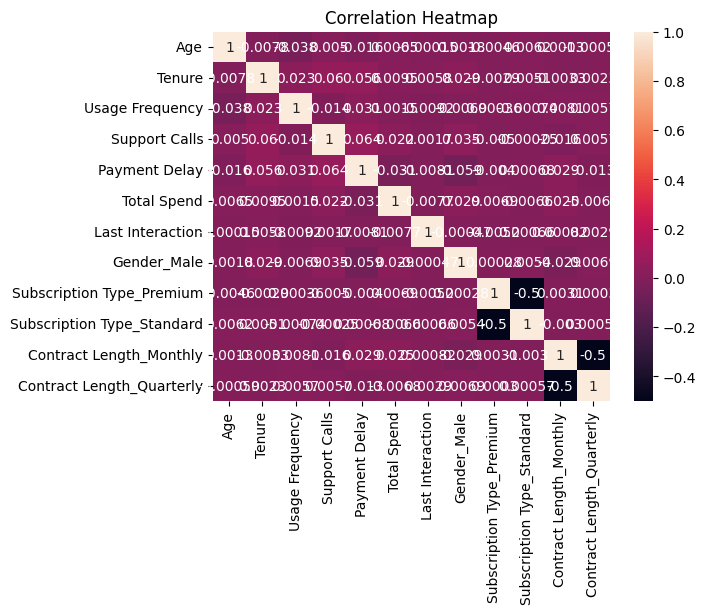

In [ ]:
import matplotlib.pyplot as plt

corr = data_corr.corr()
print(corr)
#Calculate correlation
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()
#Heatmap for variables

In [ ]:
#remove columns of binary data which have less than 5 percent of observation in order to aviod singular matric
X = data.drop(['Churn'], axis = 1)
y = data['Churn']
percent_ones = X.mean()
mask = percent_ones < 0.05
X = X.drop(X.columns[mask], axis=1)

In [ ]:
class_counts = y.value_counts()
print(class_counts)
#cheacking the balancing of our data

0    33881
1    30493
Name: Churn, dtype: int64


# **Logestic regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

LogReg = sm.Logit(y_train, X_train).fit()
print(LogReg.summary())

Optimization terminated successfully.
         Current function value: 0.395288
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                51499
Model:                          Logit   Df Residuals:                    51486
Method:                           MLE   Df Model:                           12
Date:                Fri, 21 Jul 2023   Pseudo R-squ.:                  0.4286
Time:                        20:49:52   Log-Likelihood:                -20357.
converged:                       True   LL-Null:                       -35627.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.6729      0.084    -67.932      0.000      

In [ ]:
while True:
    max_pvalue = LogReg.pvalues.max()
    if max_pvalue > 0.05:
        drop_var = LogReg.pvalues.idxmax()
        if drop_var in X.columns:
            X = X.drop(drop_var, axis=1)
            model = sm.Logit(y, sm.add_constant(X))
            logreg = model.fit()
        else:
            break
    else:
        break

print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.392875
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                64374
Model:                          Logit   Df Residuals:                    64362
Method:                           MLE   Df Model:                           11
Date:                Fri, 21 Jul 2023   Pseudo R-squ.:                  0.4321
Time:                        20:49:55   Log-Likelihood:                -25291.
converged:                       True   LL-Null:                       -44531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.7499      0.072    -79.596      0.000      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on test set: 0.826252427184466
Precision: 0.8081423305016829
Recall: 0.829003617231174
F1 Score: 0.818440061683305
AUC: 0.9050340909866545


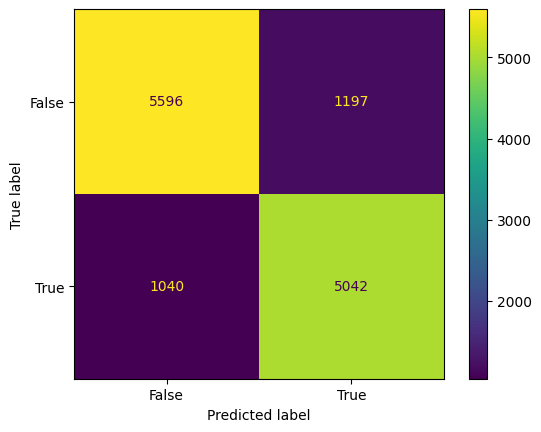

Accuracy on train set: 0.8198023262587623


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained the logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Predicting probabilities and converting to binary predictions for the test set
y_pred_proba_test = LogReg.predict_proba(X_test)[:, 1]
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Accuracy, Precision, Recall, F1 Score, and AUC for the test set
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)
f1_score = metrics.f1_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_proba_test)

print('Accuracy on test set:', accuracy_test)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)
print('AUC:', auc)

# Confusion Matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[False, True])
cm_display_test.plot()
plt.show()

# Predicting probabilities and converting to binary predictions for the train set
y_pred_proba_train = LogReg.predict_proba(X_train)[:, 1]
y_pred_train = (y_pred_proba_train >= 0.5).astype(int)

# Accuracy, Precision, Recall, F1 Score, and AUC for the train set
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)

print('Accuracy on train set:', accuracy_train)


In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = LogReg.predict_proba(X_test)

# Iterate over each customer and print the probabilities
for i in range(len(y_prob)):
    prob_0 = y_prob[i][0]  # Probability of class 0 (non-churn)
    prob_1 = y_prob[i][1]  # Probability of class 1 (churn)
    print("customer{}: class 0 probability={}, class 1 probability={}".format(i+1, prob_0, prob_1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Streaming output truncated to the last 5000 lines.
customer7876: class 0 probability=0.5699302160038482, class 1 probability=0.43006978399615187
customer7877: class 0 probability=0.6959185405852145, class 1 probability=0.3040814594147855
customer7878: class 0 probability=0.9735685768170959, class 1 probability=0.026431423182904094
customer7879: class 0 probability=0.09596568234277403, class 1 probability=0.904034317657226
customer7880: class 0 probability=0.009611464791650204, class 1 probability=0.9903885352083498
customer7881: class 0 probability=0.16513772948397853, class 1 probability=0.8348622705160215
customer7882: class 0 probability=0.9822269278704879, class 1 probability=0.01777307212951212
customer7883: class 0 probability=0.01099828506213274, class 1 probability=0.9890017149378673
customer7884: class 0 probability=0.9900664122648806, class 1 probability=0.009933587735119409
customer7885: class 0 probability=0.48635620955952963, class 1 probability=0.5136437904404704
customer

In [ ]:
best_threshold = None
best_accuracy = 0.0

for i in np.arange(0.1, 0.95, 0.2):
    y_pred = (y_pred_proba >= i).astype(int)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Threshold = ', i)
    print('Accuracy of model =',  metrics.accuracy_score(y_test, y_pred))
    print('Precision of model =', metrics.precision_score(y_test, y_pred))
    print('Recall of model =', metrics.recall_score(y_test, y_pred))
    print('F1 score of model =', metrics.f1_score(y_test, y_pred))
    print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred), '\n')

    # Check if current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = i

print('Best threshold:', best_threshold)
print('Best accuracy:', best_accuracy)


Threshold =  0.1
Accuracy of model = 0.6942135922330097
Precision of model = 0.6086686665977036
Recall of model = 0.9744948658496191
F1 score of model = 0.7493155046163643
Confusion matrix:
 [[3054 3783]
 [ 154 5884]] 

Threshold =  0.30000000000000004
Accuracy of model = 0.7958058252427185
Precision of model = 0.7241288625904011
Recall of model = 0.9120569725074528
F1 score of model = 0.8073004471157371
Confusion matrix:
 [[4739 2098]
 [ 531 5507]] 

Threshold =  0.5000000000000001
Accuracy of model = 0.8267184466019417
Precision of model = 0.8138499587798845
Recall of model = 0.8174892348459755
F1 score of model = 0.8156655374700488
Confusion matrix:
 [[5708 1129]
 [1102 4936]] 

Threshold =  0.7000000000000001
Accuracy of model = 0.7946407766990291
Precision of model = 0.8793026374608851
Recall of model = 0.6515402451142762
F1 score of model = 0.7484779299847794
Confusion matrix:
 [[6297  540]
 [2104 3934]] 

Threshold =  0.9000000000000001
Accuracy of model = 0.6769708737864077
Pre

In [ ]:
features = data.drop(['Churn'], axis = 1)
target = data['Churn']

# Calculate the most frequent class (mode) in the target column
most_frequent_class = target.mode().iloc[0]

# Calculate the accuracy baseline by counting the occurrences of the most frequent class
accuracy_baseline = (target == most_frequent_class).mean()

print("Accuracy baseline:", accuracy_baseline)

Accuracy baseline: 0.5263149718830584


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Printing the number of 'Yes' and 'No' in the train dataset
print('number of Attrition = Yes in train dataset:', y_train.sum())
print('number of Attrition = No in train dataset:', y_train.value_counts()[0])

# Comparing the accuracy of the model in each class of 'Yes' and 'No'
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
tp = cm[0][0]
fp = cm[0][1]
tn = cm[1][1]
fn = cm[1][0]

accuracy_yes = tp / (tp + fp)
accuracy_no = tn / (tn + fp)
print("Accuracy for 'Yes' class: ", accuracy_yes)
print("Accuracy for 'No' class: ", accuracy_no)

number of Attrition = Yes in train dataset: 24455
number of Attrition = No in train dataset: 27044
Accuracy for 'Yes' class:  0.32560450480291486
Accuracy for 'No' class:  0.6237294400295694


In [ ]:
accuracy_sum = 0
for i in range(5,51,5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
  X_train = sm.add_constant(X_train)
  X_test = sm.add_constant(X_test)
  LogReg = sm.Logit(y_train, X_train).fit()
  y_pred_proba = LogReg.predict(X_test)
  y_pred = (y_pred_proba >= 0.5).astype(int)
  accuracy_sum = accuracy_sum + metrics.accuracy_score(y_test, y_pred)
  print('accurary of seed',i,'=',metrics.accuracy_score(y_test, y_pred))
print('average of accuracy of model in 10 different random seed=', accuracy_sum/10)

Optimization terminated successfully.
         Current function value: 0.391619
         Iterations 7
accurary of seed 5 = 0.8227572815533981
Optimization terminated successfully.
         Current function value: 0.393396
         Iterations 7
accurary of seed 10 = 0.8282718446601942
Optimization terminated successfully.
         Current function value: 0.393223
         Iterations 7
accurary of seed 15 = 0.8317669902912621
Optimization terminated successfully.
         Current function value: 0.393052
         Iterations 7
accurary of seed 20 = 0.8230679611650485
Optimization terminated successfully.
         Current function value: 0.394642
         Iterations 7
accurary of seed 25 = 0.8304466019417476
Optimization terminated successfully.
         Current function value: 0.393252
         Iterations 7
accurary of seed 30 = 0.8278058252427184
Optimization terminated successfully.
         Current function value: 0.392215
         Iterations 7
accurary of seed 35 = 0.8236116504854369


# **Tree**

In [ ]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
Tree1 = DecisionTreeClassifier(random_state = 42)

#Train the tree model using the training sets
Tree1.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_Tree1= Tree1.predict(X_test)

# Accuracy and confusin matrix
print("Accuracy of Tree1:", accuracy_score(y_test, y_pred_Tree1))
print('confusion matrix of Tree1:','\n', confusion_matrix(y_test, y_pred_Tree1))

Accuracy of Tree1: 0.9975145631067961
confusion matrix of Tree1: 
 [[6777   16]
 [  16 6066]]


Best max depth: 20 Best min samples split: 10


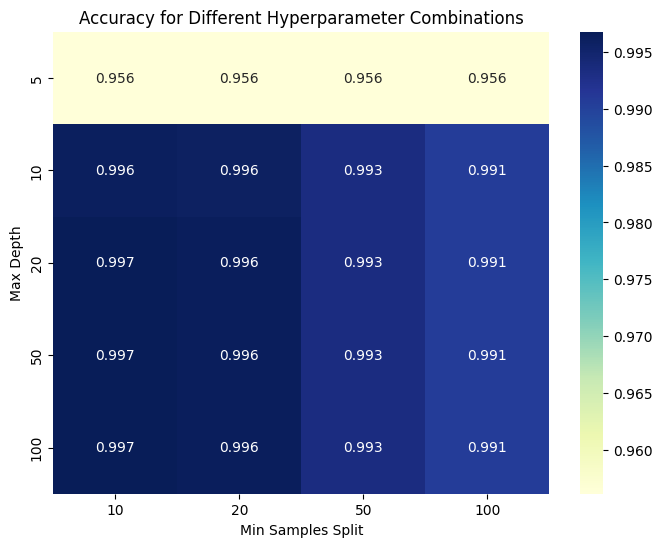

Accuracy of Tree after tuning: 0.9975145631067961
Confusion matrix of Tree after tuning 
 [[6779   14]
 [  18 6064]]


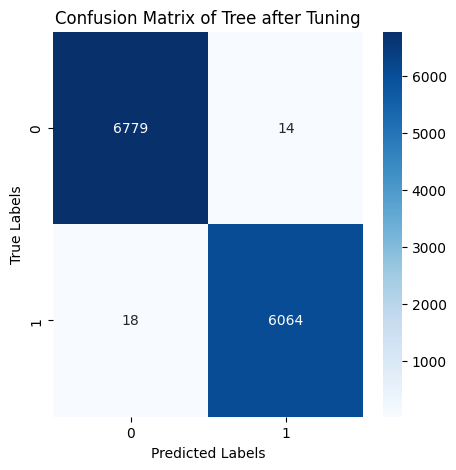

AUC of Tree after tuning: 0.9989176456042894


In [ ]:
max_depths = [5, 10, 20, 50, 100]
min_samples_splits = [10, 20, 50, 100]
best_max_depth = None
best_min_samples_split = None
best_score = -1
accuracy_scores = []

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

for max_depth in max_depths:
    row_scores = []
    for min_samples_split in min_samples_splits:
        Tree_B = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_split=min_samples_split)
        Tree_B.fit(X_train1, y_train1)
        y_pred_Tree_B = Tree_B.predict(X_test1)
        score = accuracy_score(y_test1, y_pred_Tree_B)
        row_scores.append(score)
        if score > best_score:
            best_score = score
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split
    accuracy_scores.append(row_scores)

print('Best max depth:', best_max_depth, 'Best min samples split:', best_min_samples_split)

# Create the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(np.array(accuracy_scores), annot=True, fmt=".3f", cmap="YlGnBu",
            xticklabels=min_samples_splits, yticklabels=max_depths)
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Accuracy for Different Hyperparameter Combinations')
plt.show()

# Train the best model on the full training data and evaluate on the test set
Tree_B = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth, min_samples_split=best_min_samples_split)
Tree_B.fit(X_train, y_train)
y_pred_Tree_B = Tree_B.predict(X_test)

print("Accuracy of Tree after tuning:", accuracy_score(y_test, y_pred_Tree_B))
print('Confusion matrix of Tree after tuning','\n', confusion_matrix(y_test, y_pred_Tree_B))

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_Tree_B)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Tree after Tuning')
plt.show()

y_pred_proba_Tree_B = Tree_B.predict_proba(X_test)[:, 1]  # Probabilities of positive class
print("AUC of Tree after tuning:", roc_auc_score(y_test, y_pred_proba_Tree_B))

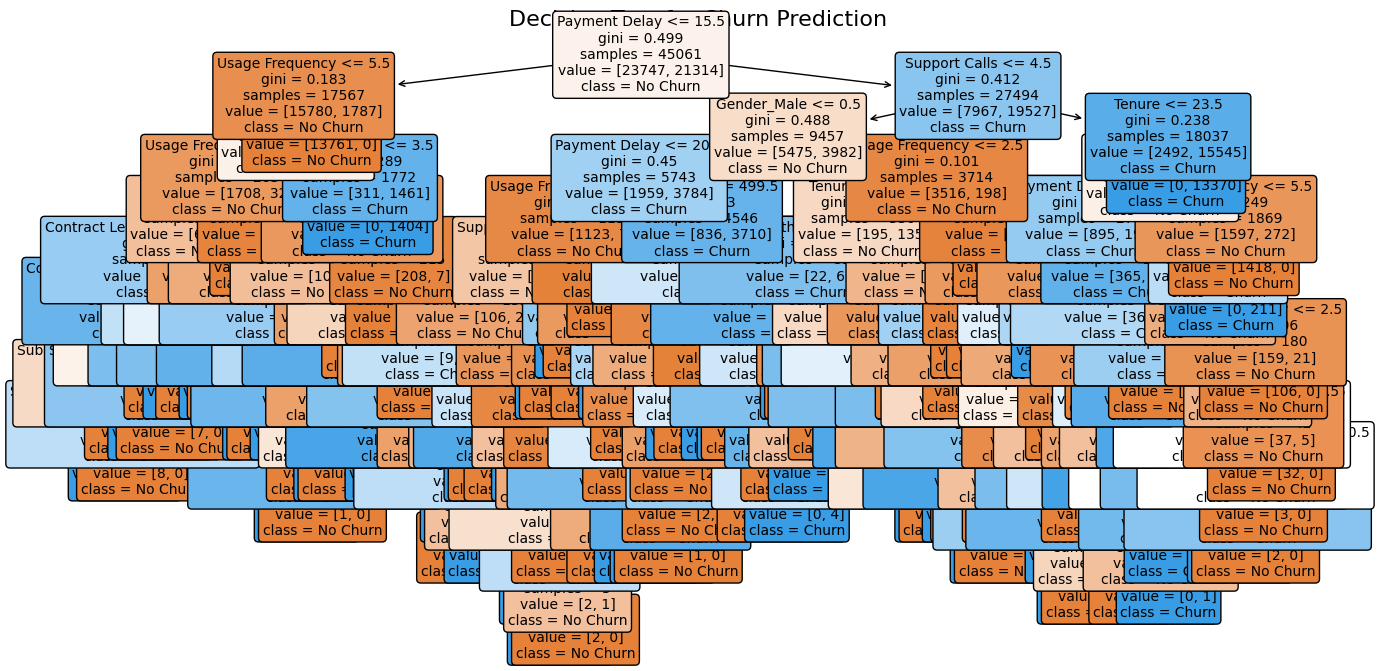

Managerial Insights:
The feature 'Payment Delay' has high importance in predicting churn.
Managers should consider its impact and implement targeted strategies:
- Implement timely payment reminders and flexible payment options to reduce churn risk.

The feature 'Support Calls' has high importance in predicting churn.
Managers should consider its impact and implement targeted strategies:
- Improve customer service and resolve issues promptly to enhance customer satisfaction.

The feature 'Gender_Male' has high importance in predicting churn.
Managers should consider its impact and implement targeted strategies:



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Replace 'target_column' with the name of the column containing your target variable
target_column = 'Churn'

# Define feature_cols as a list of feature names excluding the target column
feature_cols = [col for col in data.columns if col != target_column]

# Split the data into features (X) and target (y)
X = data[feature_cols]
y = data[target_column]

# Create and train the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dtc, feature_names=feature_cols, class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Churn Prediction', fontsize=16)
plt.show()

# Managerial Insights
print("Managerial Insights:")

# Extract the top 3 most important features from the Decision Tree
top_features = dtc.feature_importances_.argsort()[-3:][::-1]

for feature_idx in top_features:
    feature_name = feature_cols[feature_idx]
    print(f"The feature '{feature_name}' has high importance in predicting churn.")
    print("Managers should consider its impact and implement targeted strategies:")
    # Provide specific managerial insights based on the feature
    if feature_name == 'Payment Delay':
        print("- Implement timely payment reminders and flexible payment options to reduce churn risk.")
    elif feature_name == 'Support Calls':
        print("- Improve customer service and resolve issues promptly to enhance customer satisfaction.")
    elif feature_name == 'Tenure':
        print("- Invest in customer loyalty programs to retain long-term customers and strengthen relationships.")
    print("")

# Add more insights based on other important features as needed.

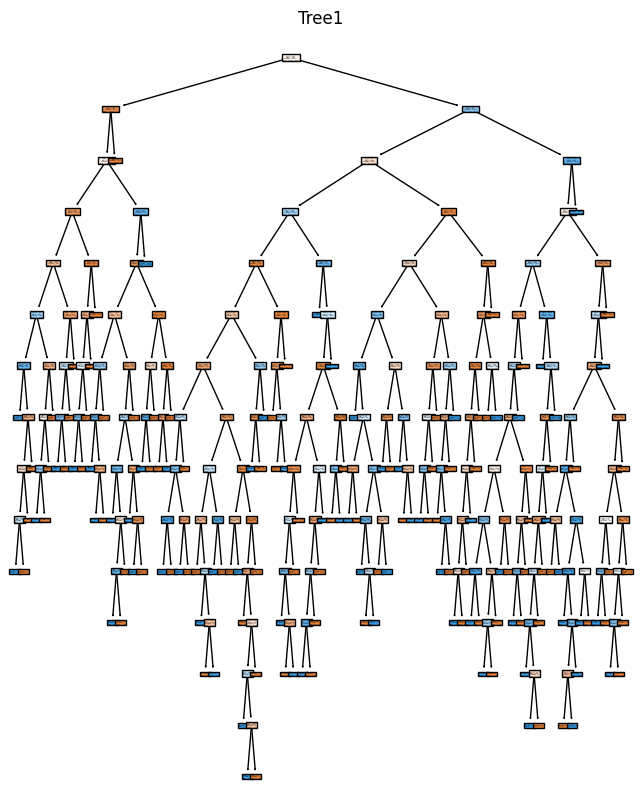

In [ ]:
plt.figure(figsize=(8,10))
plot_tree(dtc, filled=True)
plt.title('Tree1')
plt.show()

In [ ]:
print("Number of splits in tree 1:", dtc.tree_.node_count - 1)

Number of splits in tree 1: 302


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

# Compare the accuracy scores
if accuracy_train > accuracy_test:
    print("The Decision Tree model may be overfitting.")
else:
    print("The Decision Tree model is not overfitting.")

Accuracy on training set: 1.0
Accuracy on test set: 0.9979288562108425
The Decision Tree model may be overfitting.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Calculate accuracy on the training set
accuracy_train = dt_classifier.score(X_train, y_train)

# Calculate accuracy using cross-validation (e.g., 5-fold cross-validation)
cross_val_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
mean_cv_accuracy = cross_val_scores.mean()

# Calculate accuracy on the test set
accuracy_test = dt_classifier.score(X_test, y_test)

# Print the results
print("Accuracy on training set:", accuracy_train)
print("Mean cross-validation accuracy:", mean_cv_accuracy)
print("Accuracy on test set:", accuracy_test)

# Compare the accuracy scores
if accuracy_train > mean_cv_accuracy and accuracy_train > accuracy_test:
    print("The Decision Tree model may be overfitting.")
else:
    print("The Decision Tree model is not overfitting.")

Accuracy on training set: 1.0
Mean cross-validation accuracy: 0.9960941730909079
Accuracy on test set: 0.9979288562108425
The Decision Tree model may be overfitting.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded in X_train, X_test, y_train, and y_test

# Create a Decision Tree classifier with increased regularization
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = dt_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the test accuracy
print("Accuracy on test set:", accuracy_test)

Accuracy on test set: 0.9975922330097088


# **Random Forrest**

Accuracy of random forest: 0.9982912621359223
Confusion matrix of random forest:
 [[6791    2]
 [  20 6062]]
AUC of random forest: 0.9999915527101448


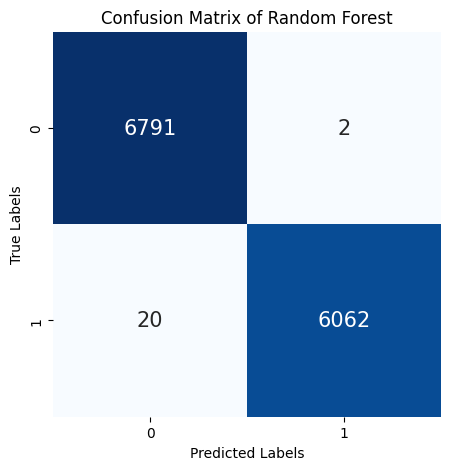

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Create and train the random forest classifier
rfb = RandomForestClassifier(random_state=42)
rfb.fit(X_train, y_train)

# Predict the target values using the trained random forest classifier
y_pred_rfb = rfb.predict(X_test)

# Predict the class probabilities using the trained random forest classifier
y_pred_proba_rfb = rfb.predict_proba(X_test)[:, 1]  # Use the probabilities of the positive class

# Calculate and print the accuracy and confusion matrix
print("Accuracy of random forest:", accuracy_score(y_test, y_pred_rfb))
print('Confusion matrix of random forest:\n', confusion_matrix(y_test, y_pred_rfb))

# Calculate and print the AUC score using the predicted probabilities
print("AUC of random forest:", roc_auc_score(y_test, y_pred_proba_rfb))

# Plot the confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_rfb)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Random Forest')
plt.show()

In [ ]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 120, 150],
    'max_depth': [5, 10, 20]
}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best parameters:', best_params)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities of positive class

print('Accuracy of random forest:', accuracy_score(y_test, y_pred_rf))
print('Confusion matrix of random forest:\n', confusion_matrix(y_test, y_pred_rf))
print('AUC of random forest:', roc_auc_score(y_test, y_pred_proba_rf))

Best parameters: {'max_depth': 20, 'n_estimators': 120}
Accuracy of random forest: 0.9977217418319266
Confusion matrix of random forest:
 [[10124    10]
 [   34  9145]]
AUC of random forest: 0.9999881960850865


Feature Importance:


,Feature,Importance
4,Payment Delay,0.436431
3,Support Calls,0.162828
1,Tenure,0.107520
2,Usage Frequency,0.081875
7,Gender_Male,0.077534
5,Total Spend,0.047256
0,Age,0.040988
10,Contract Length_Monthly,0.025127
6,Last Interaction,0.010167
11,Contract Length_Quarterly,0.006469


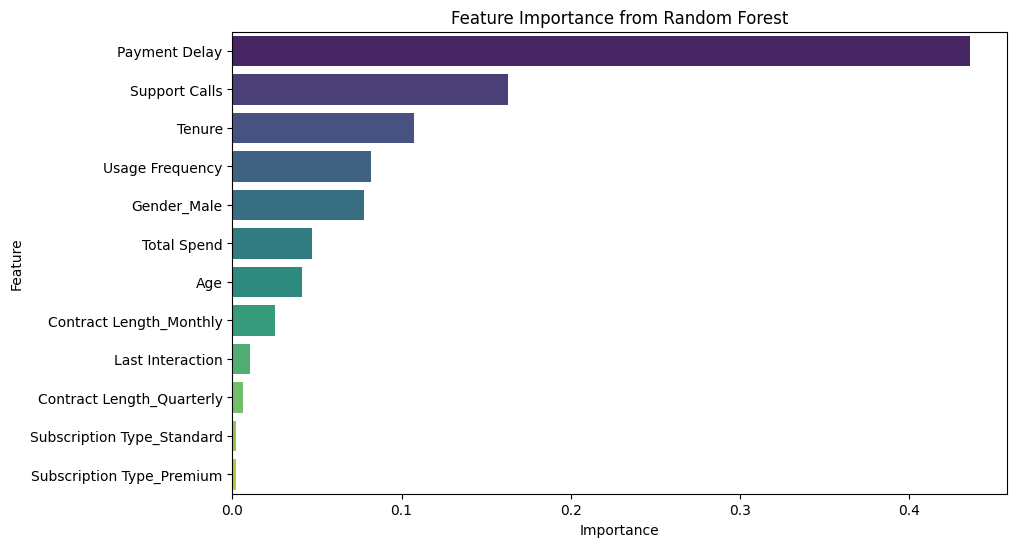

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Replace 'target_column' with the name of the column containing your target variable
target_column = 'Churn'

# Define feature_cols as a list of feature names excluding the target column
feature_cols = [col for col in data.columns if col != target_column]

# Split the data into features (X) and target (y)
X = data[feature_cols]
y = data[target_column]

# Split the data into training and testing sets (if not done previously)
# Assuming you have X_train, X_test, y_train, and y_test

# Create and train the Random Forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
feature_importances = rfc.feature_importances_

# Create a DataFrame to store feature importance values and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance table with color
cm = sns.light_palette("green", as_cmap=True)
styled_table = feature_importance_df.style.background_gradient(cmap=cm)
print("Feature Importance:")
display(styled_table)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into training and test sets
# X_train, X_test, y_train, y_test

# Create and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on training and test data
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

# Compare the accuracy scores
if accuracy_train > accuracy_test:
    print("The model may be overfitting.")
else:
    print("The model is not overfitting.")

Accuracy on training set: 1.0
Accuracy on test set: 0.9982912621359223
The model may be overfitting.


# **KKN classifier**

Accuracy of KNN Classifier: 0.9069538652720965
Confusion matrix of KNN Classifier:
 [[8957 1177]
 [ 620 8559]]


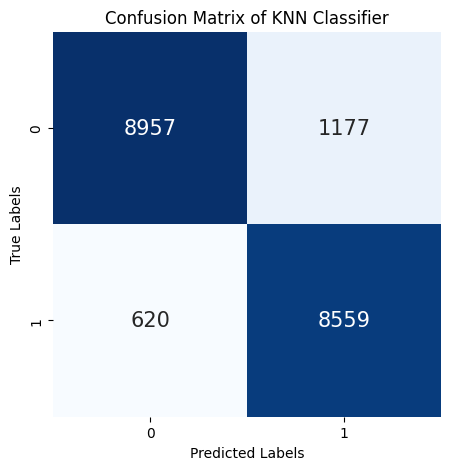

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your data into a DataFrame called 'data'
# Replace 'Churn' with the name of the column containing your target variable
target_column = 'Churn'

# Separate features (X) and target variable (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better performance of KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Calculate and print accuracy and confusion matrix for KNN classifier
print("Accuracy of KNN Classifier:", accuracy_score(y_test, y_pred_knn))
print("Confusion matrix of KNN Classifier:\n", confusion_matrix(y_test, y_pred_knn))

# Plot the confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 15})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of KNN Classifier')
plt.show()


In [ ]:
# Calculate and print accuracy and confusion matrix for KNN classifier
print("Accuracy of KNN Classifier:", accuracy_score(y_test, y_pred_knn))
print("Confusion matrix of KNN Classifier:\n", confusion_matrix(y_test, y_pred_knn))

# Extract misclassified samples
misclassified_samples = X_test[y_test != y_pred_knn]

# Display features that contributed to misclassifications
print("\nFeatures contributing to misclassifications:")
for idx, sample in misclassified_samples.iterrows():
    print(f"Sample {idx}:")
    for feature, value in sample.items():
        print(f"{feature}: {value}")

# Managerial Insights for Improving KNN Classifier:
print("\nManagerial Insights for Improving KNN Classifier:")

# Payment Delay Insights
print("- Analyze 'Payment Delay' feature for misclassifications.")
print("  - Implement timely payment reminders and provide flexible payment options to reduce churn risk.")

# Support Calls Insights
print("- Analyze 'Support Calls' feature for misclassifications.")
print("  - Focus on improving customer service to resolve issues promptly and enhance satisfaction.")

# Tenure Insights
print("- Analyze 'Tenure' feature for misclassifications.")
print("  - Invest in customer loyalty programs to retain long-term customers and improve retention.")

# Total Spend Insights
print("- Analyze 'Total Spend' feature for misclassifications.")
print("  - Encourage customers to spend more by offering incentives, loyalty rewards, or personalized offers.")

# By analyzing the misclassified samples and understanding the contributing features, managers can identify areas for improvement in their customer retention strategies. Addressing customer concerns related to payment, customer service, customer loyalty, and spending behavior can lead to better customer satisfaction and reduced churn rates. Implementing these insights can help the business build stronger customer relationships and enhance customer retention, ultimately leading to increased profitability and sustainable growth.


Streaming output truncated to the last 5000 lines.
Tenure: 24
Usage Frequency: 14
Support Calls: 10
Payment Delay: 16
Total Spend: 685
Last Interaction: 17
Gender_Male: 0
Subscription Type_Premium: 0
Subscription Type_Standard: 1
Contract Length_Monthly: 0
Contract Length_Quarterly: 0
Sample 51317:
Age: 38
Tenure: 31
Usage Frequency: 15
Support Calls: 5
Payment Delay: 26
Total Spend: 164
Last Interaction: 17
Gender_Male: 1
Subscription Type_Premium: 0
Subscription Type_Standard: 1
Contract Length_Monthly: 1
Contract Length_Quarterly: 0
Sample 36306:
Age: 46
Tenure: 18
Usage Frequency: 6
Support Calls: 8
Payment Delay: 28
Total Spend: 809
Last Interaction: 19
Gender_Male: 0
Subscription Type_Premium: 1
Subscription Type_Standard: 0
Contract Length_Monthly: 0
Contract Length_Quarterly: 1
Sample 40618:
Age: 34
Tenure: 52
Usage Frequency: 14
Support Calls: 9
Payment Delay: 14
Total Spend: 698
Last Interaction: 17
Gender_Male: 1
Subscription Type_Premium: 0
Subscription Type_Standard: 1
Con

# **SVM Classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better performance of SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM) Classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


Accuracy of SVM Classifier: 0.8303215450732667
Confusion matrix of SVM Classifier:
 [[8404 1730]
 [1547 7632]]
Feature Importance:


,Feature,Importance
4,Payment Delay,1.422884
3,Support Calls,0.738801
1,Tenure,0.458191
0,Age,0.173100
10,Contract Length_Monthly,0.124274
6,Last Interaction,-0.006887
9,Subscription Type_Standard,-0.011676
8,Subscription Type_Premium,-0.017435
11,Contract Length_Quarterly,-0.039603
5,Total Spend,-0.183560


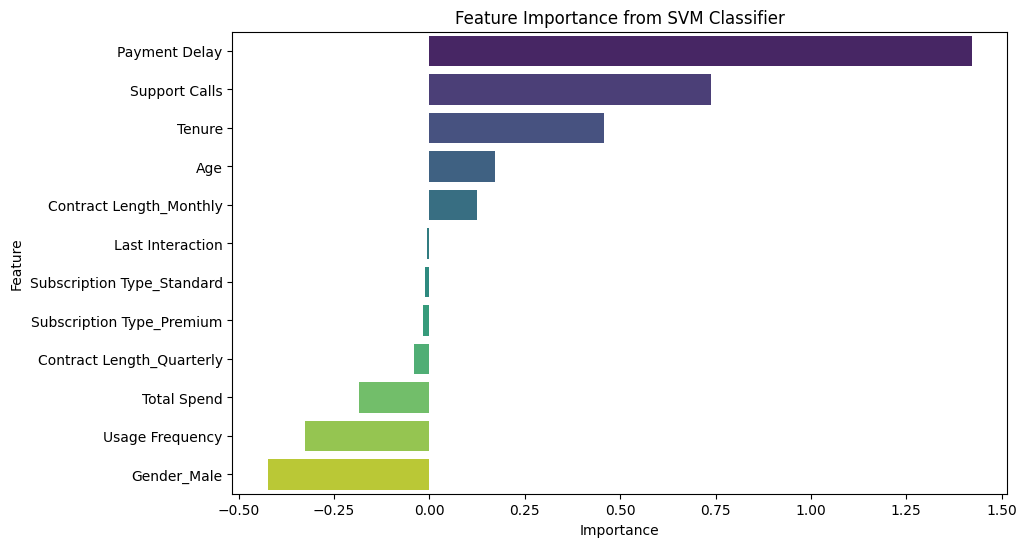

Classification Report of SVM Classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10134
           1       1.00      0.99      0.99      9179

    accuracy                           1.00     19313
   macro avg       1.00      0.99      1.00     19313
weighted avg       1.00      1.00      1.00     19313



In [ ]:
# Calculate and print accuracy and confusion matrix for SVM classifier
print("Accuracy of SVM Classifier:", accuracy_score(y_test, y_pred_svm))
print("Confusion matrix of SVM Classifier:\n", confusion_matrix(y_test, y_pred_svm))

# Extract TN, FP, FN, and TP from confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()

# Calculate the precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)


# Get feature importance from the SVM model
feature_importances = svm.coef_[0]

# Create a DataFrame to store feature importance values and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance table with color
cm = sns.light_palette("green", as_cmap=True)
styled_table = feature_importance_df.style.background_gradient(cmap=cm)
print("Feature Importance:")
display(styled_table)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from SVM Classifier')
plt.show()

# **GradientBoostingClassifier**

Accuracy of Gradient Boosting Classifier: 0.9950292549060219
Confusion matrix of Gradient Boosting Classifier:
 [[10103    31]
 [   65  9114]]
Feature Importance:


,Feature,Importance
4,Payment Delay,0.436657
3,Support Calls,0.151993
1,Tenure,0.130345
7,Gender_Male,0.095754
2,Usage Frequency,0.085080
0,Age,0.047711
5,Total Spend,0.032027
10,Contract Length_Monthly,0.018110
11,Contract Length_Quarterly,0.001652
8,Subscription Type_Premium,0.000467


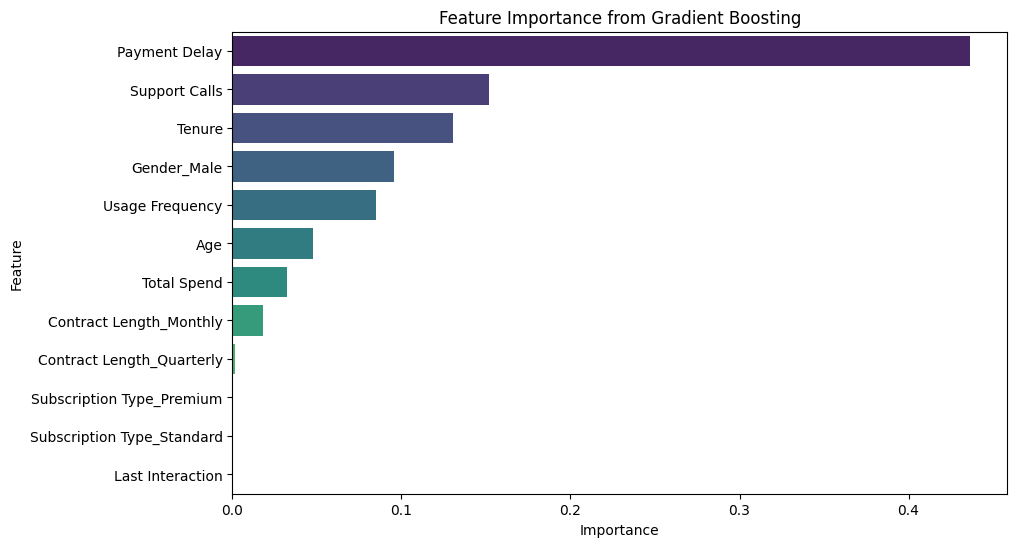

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

target_column = 'Churn'

feature_cols = [col for col in data.columns if col != target_column]

# Separate features (X) and target variable (y)
X = data[feature_cols]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better performance of Gradient Boosting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

# Calculate and print accuracy and confusion matrix for Gradient Boosting classifier
print("Accuracy of Gradient Boosting Classifier:", accuracy_score(y_test, y_pred_gb))
print("Confusion matrix of Gradient Boosting Classifier:\n", confusion_matrix(y_test, y_pred_gb))

# Create a DataFrame to store feature importance values and their corresponding feature names
feature_importances = gb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a colorful table
cm = sns.light_palette("blue", as_cmap=True)
styled_table = feature_importance_df.style.background_gradient(cmap=cm)

# Display the table
print("Feature Importance:")
display(styled_table)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting')
plt.show()
